**<h1 align="center">Universidad Internacional del Ecuador</h1>**

**<h2 align="center">Procesamiento de Imágenes y Señales</h2>**

***<h2 align="left">Grupo 6</h2>***
- ***<h2 align="left">Dario Wladimir Herrera Chávez</h2>***
- ***<h2 align="left"></h2>***
- ***<h2 align="left"></h2>***

### 📌 Nota
Ejecuta en primera instancia el primer bloque de código ***Carga de imágenes*** para poder usar las funciones creadas en el segundo bloque de código

## - ***Carga de imágenes***

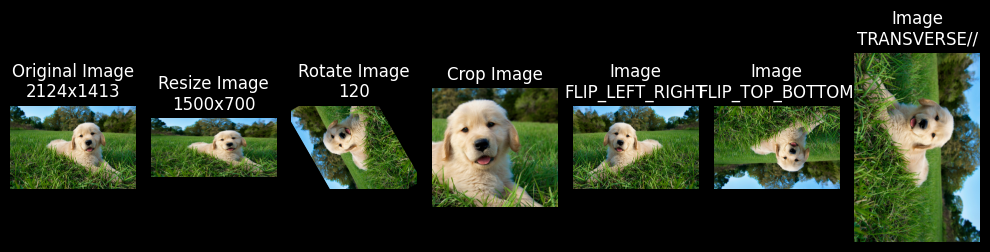

In [2]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

def main():
    try:
        image_path = "resources/dog.jpg"
        (resize_width, resize_height) = (1500, 700)
        image_angle = 120
        box_crop = (950, 200, 1900, 1100)
        t_flip = Image.Transpose.FLIP_LEFT_RIGHT
        t_flip_bottom = Image.Transpose.FLIP_TOP_BOTTOM
        t_transverse = Image.Transpose.TRANSVERSE

        image = load_image(image_path)
        image_data = get_image_info(image)
        (width, height) = image_data[0]
        image_format = image_data[1]

        print("**********************************************")
        print(f"Image Info:\n Width:{width}\n Height:{height}")
        print("**********************************************")
        print(f"Image:\n Format:{image_format}")
        print("**********************************************")

        _, axes = plot_images(1, 7)
        hide_axes_info(axes)

        axes[0].imshow(image); axes[0].set_title(f"Original Image\n{width}x{height}")
        axes[1].imshow(resize_image(image, resize_width, resize_height)); axes[1].set_title(f"Resize Image\n{resize_width}x{resize_height}")
        axes[2].imshow(rotate_image(image, image_angle)); axes[2].set_title(f"Rotate Image\n{image_angle}")
        axes[3].imshow(crop_image(image, box_crop)); axes[3].set_title(f"Crop Image")
        axes[4].imshow(transpose_image(image, t_flip)); axes[4].set_title(f"Image\nFLIP_LEFT_RIGHT")
        axes[5].imshow(transpose_image(image, t_flip_bottom)); axes[5].set_title(f"Image\nFLIP_TOP_BOTTOM")
        axes[6].imshow(transpose_image(image, t_transverse)); axes[6].set_title(f"Image\nTRANSVERSE")

        plt.tight_layout()
        plt.show()
    except FileNotFoundError:
        print("There was an error getting the image")

def load_image(image_path):
    return Image.open(image_path)

def get_image_info(image):
    return [image.size, image.format, image.mode]

def plot_images(row, cols):
    return plt.subplots(row, cols, figsize=(10, 5), constrained_layout=True)

def hide_axes_info(axes):
    for ax in axes: ax.axis('off')

def resize_image(image, width, height):
    return image.resize((width,height))

def rotate_image(image, angle):
    return image.rotate(angle=angle)

def crop_image(image, box_crop):
    return image.crop(box_crop)

def transpose_image(image, transpose):
    return image.transpose(transpose)

if __name__ == "__main__":
    main()

## - ***Fotografia con computador***

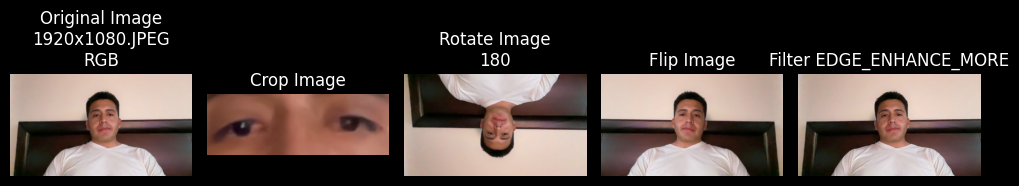

In [3]:
import cv2
import os

def main():
    try:
        image_path = "resources/picture.jpg"
        image = load_image(image_path)
        box_crop = (870, 400, 1108, 480)
        t_flip = Image.Transpose.FLIP_LEFT_RIGHT
        t_flip_bottom = Image.Transpose.FLIP_TOP_BOTTOM

        if image is None:
            take_picture()

        image_data = get_image_info(image)
        (width, height) = image_data[0]
        image_format = image_data[1]

        print("**********************************************")
        print(f"Image Info:\n Width:{width}\n Height:{height}")
        print("**********************************************")
        print(f"Image:\n Format:{image_format}")
        print("**********************************************")

        _, axes = plot_images(1,5)
        hide_axes_info(axes)

        axes[0].imshow(image); axes[0].set_title(f"Original Image\n{width}x{height}.{image_format}\n{image.mode}")
        axes[1].imshow(crop_image(image, box_crop)); axes[1].set_title(f"Crop Image")
        axes[2].imshow(transpose_image(image, t_flip_bottom)); axes[2].set_title(f"Rotate Image\n{180}")
        axes[3].imshow(transpose_image(image, t_flip)); axes[3].set_title(f"Flip Image")
        axes[4].imshow(sharpen_image(image, ImageFilter.EDGE_ENHANCE_MORE)); axes[4].set_title(f"Filter EDGE_ENHANCE_MORE")

        plt.tight_layout()
        plt.show()
    except FileNotFoundError:
        print("There was an error")

def sharpen_image(image, image_filter):
    return image.filter(image_filter)

def take_picture():
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        raise RuntimeError("There was an error, cannot open camera")

    print("Camera is Active")
    print("Press ENTER to save or Q to exit")

    while True:
        ret, frame = cap.read()

        if not ret or frame is None:
            print("Frame is not valid")
            continue

        cv2.imshow("Camera - Press ENTER to SAVE", frame)

        key = cv2.waitKey(30) & 0xFF

        if key != 255:
            print("Keyboard detected:", key, chr(key))

        if key in (10, 13):
            picture_name = "picture.jpg"
            resources_dir = os.path.join(os.getcwd(), "resources")
            os.makedirs(resources_dir, exist_ok=True)
            ruta = os.path.join(resources_dir, picture_name)

            ok = cv2.imwrite(ruta, frame)
            print("Pictura save", ok)
            print("Path:", ruta)
            break

        elif key == ord('q') or key == ord('Q'):
            break

    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()

